# Load libraries and dataset

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import networkx as nx
import copy
import warnings
warnings.filterwarnings('ignore')

In [2]:
from load_models import *
from syngem_utils import *

In [3]:
torch.manual_seed(21)
np.random.seed(21)

In [4]:
batch_of_images_mnist = get_images_mnist(batch_size = 100)

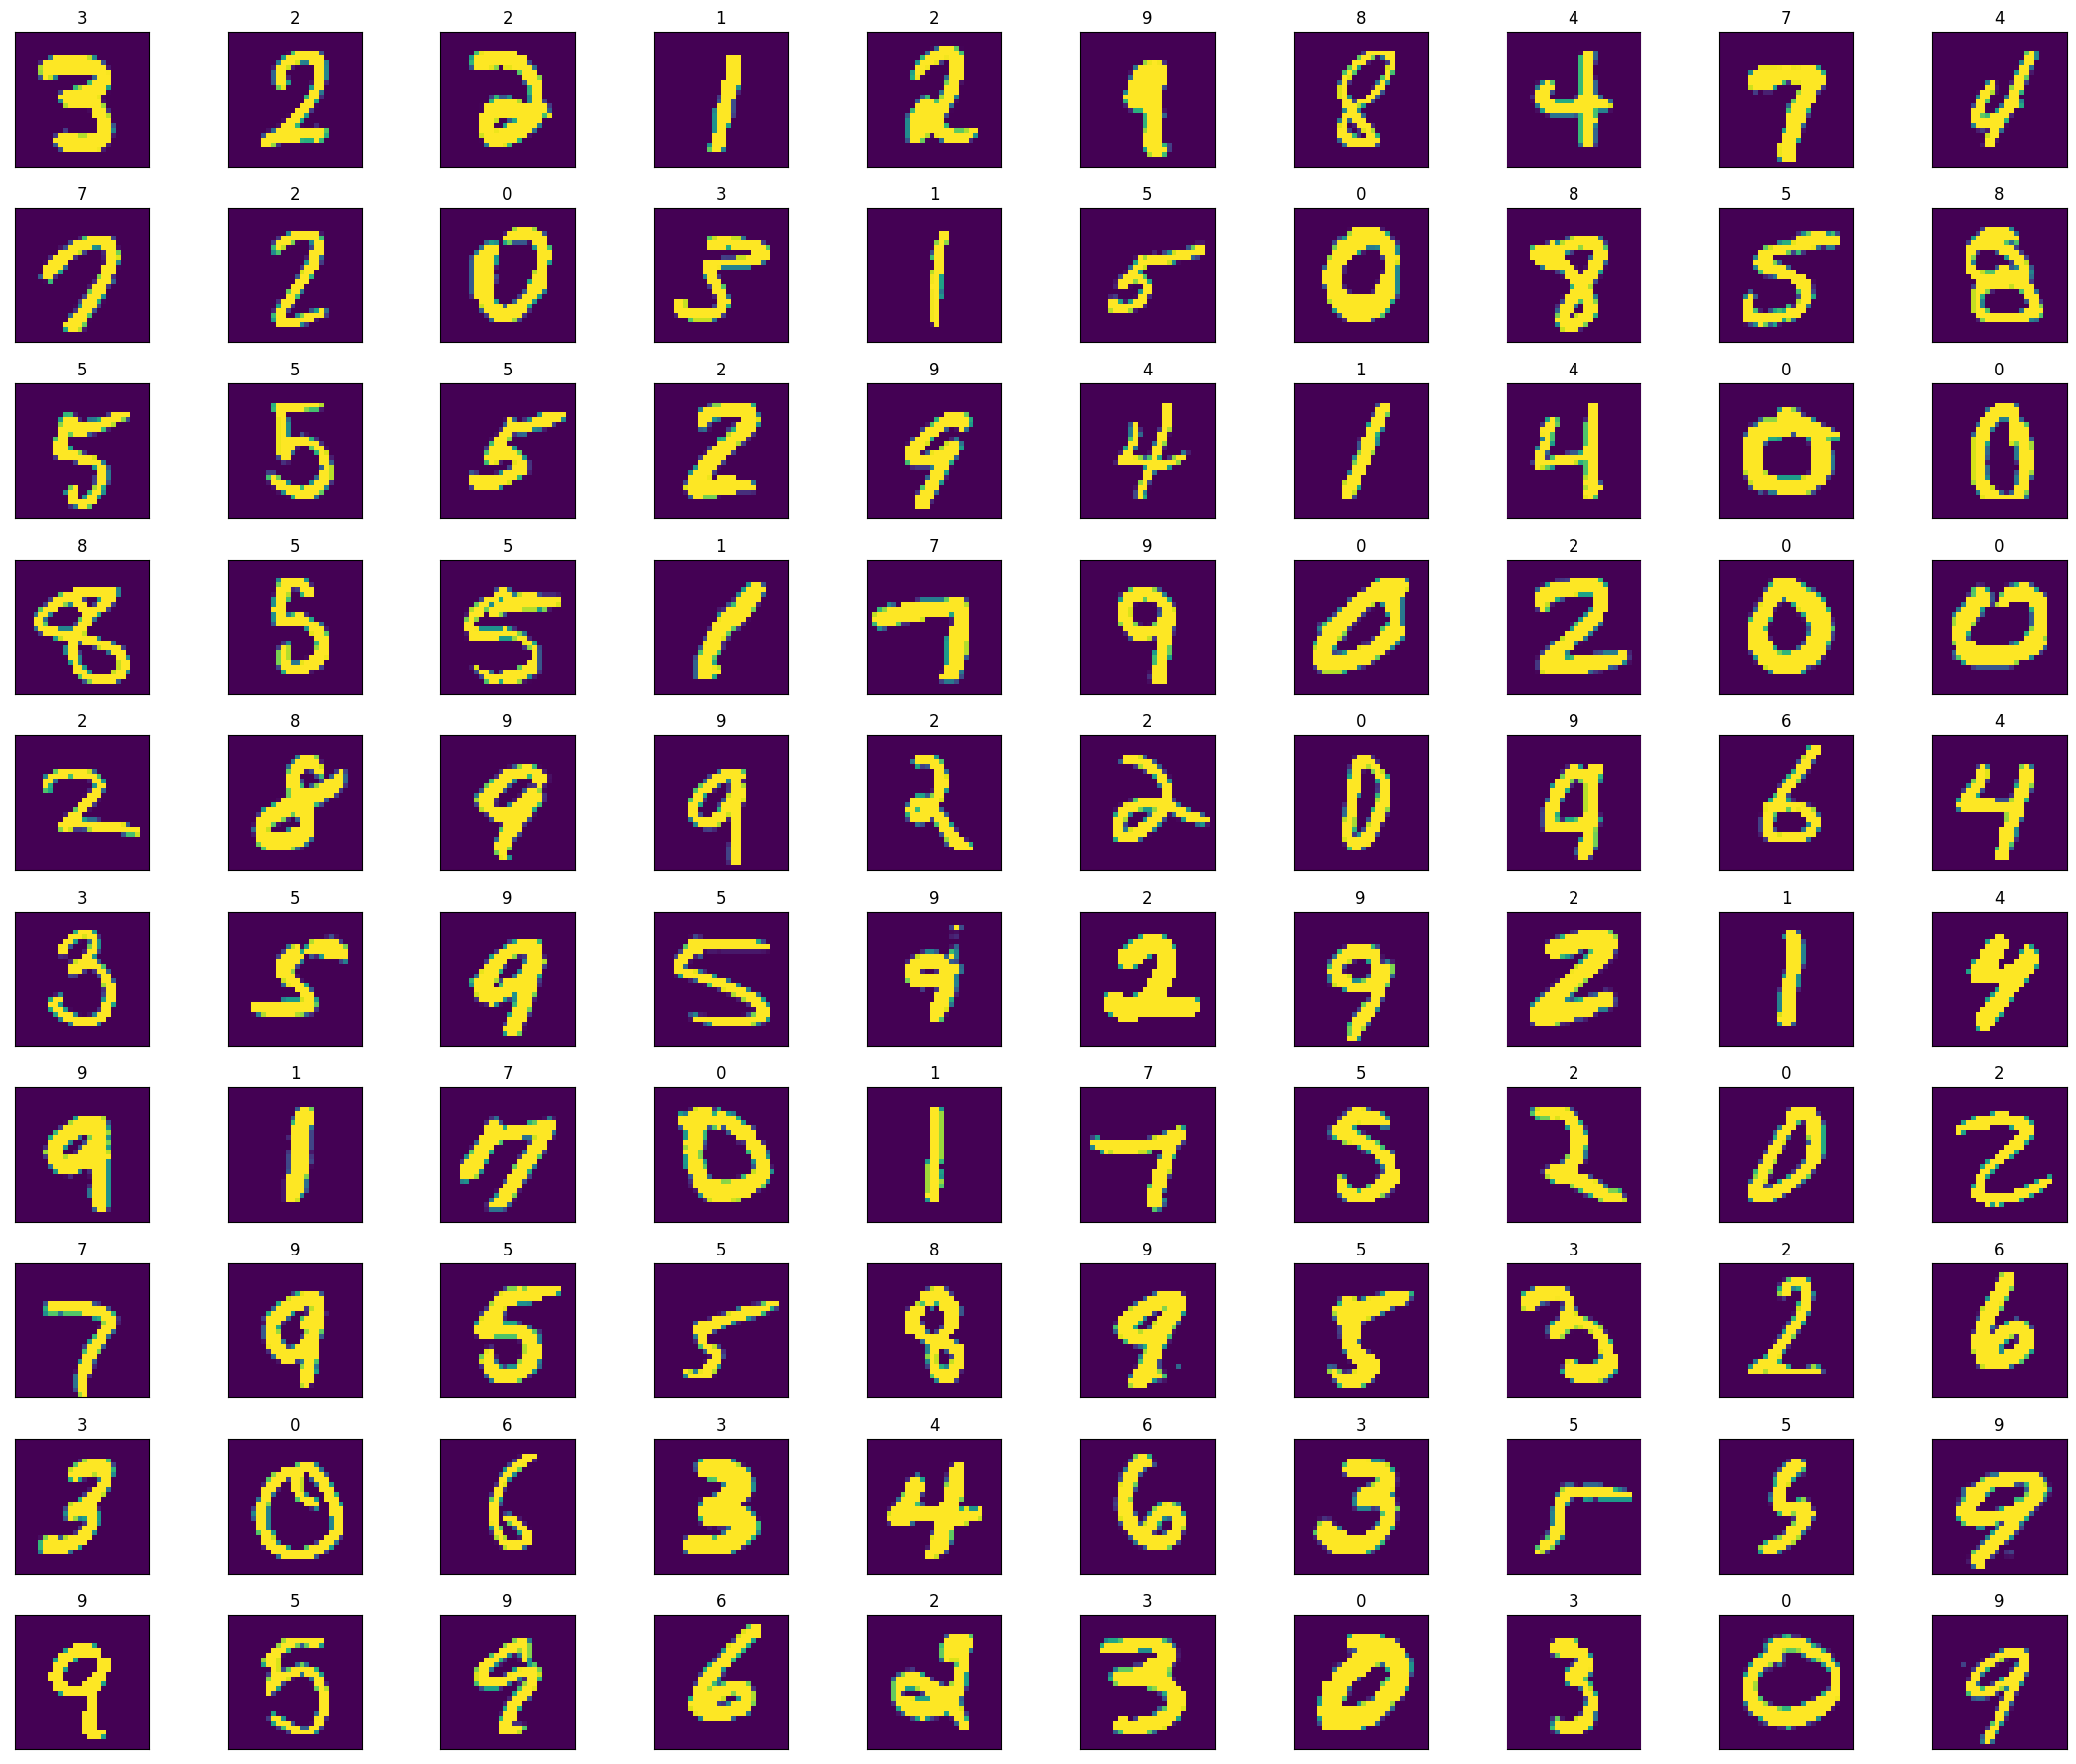

In [5]:
images_mnist, _ = batch_of_images_mnist.get_new_images(output = True)
batch_of_images_mnist.display((22,18))

In [6]:
gem_model_50_21 = load_gemini_fc_50_sparsity_seed_21()
gem_model_50_42 = load_gemini_fc_50_sparsity_seed_42()
gem_model_50_63 = load_gemini_fc_50_sparsity_seed_63()

=> Reading YAML config from Configs/hypercube/resnet20/resnet20_quantized_iter_hc_target_sparsity_1_4_highreg.yml
=> Reading YAML config from Configs/synflow_fc.yml


In [7]:
syn_model_50_21 = load_synflow_fc_sparsity_50_seed_21()
syn_model_50_42 = load_synflow_fc_sparsity_50_seed_42()
syn_model_50_63 = load_synflow_fc_sparsity_50_seed_63()

In [8]:
gem_model_20_21 = load_gemini_fc_20_sparsity_seed_21()
gem_model_20_42 = load_gemini_fc_20_sparsity_seed_42()
gem_model_20_63 = load_gemini_fc_20_sparsity_seed_63()

In [9]:
syn_model_20_21 = load_synflow_fc_sparsity_20_seed_21()
syn_model_20_42 = load_synflow_fc_sparsity_20_seed_42()
syn_model_20_63 = load_synflow_fc_sparsity_20_seed_63()

In [10]:
gem_model_10_21 = load_gemini_fc_10_sparsity_seed_21()
gem_model_10_42 = load_gemini_fc_10_sparsity_seed_42()
gem_model_10_63 = load_gemini_fc_10_sparsity_seed_63()

In [11]:
syn_model_10_21 = load_synflow_fc_sparsity_10_seed_21()
syn_model_10_42 = load_synflow_fc_sparsity_10_seed_42()
syn_model_10_63 = load_synflow_fc_sparsity_10_seed_63()

In [12]:
gem_model_5_21 = load_gemini_fc_5_sparsity_seed_21()
gem_model_5_42 = load_gemini_fc_5_sparsity_seed_42()
gem_model_5_63 = load_gemini_fc_5_sparsity_seed_63()

In [13]:
syn_model_5_21 = load_synflow_fc_sparsity_5_seed_21()
syn_model_5_42 = load_synflow_fc_sparsity_5_seed_42()
syn_model_5_63 = load_synflow_fc_sparsity_5_seed_63()

In [14]:
gem_model_2_21 = load_gemini_fc_2_sparsity_seed_21()
gem_model_2_42 = load_gemini_fc_2_sparsity_seed_42()
gem_model_2_63 = load_gemini_fc_2_sparsity_seed_63()

In [15]:
syn_model_2_21 = load_synflow_fc_sparsity_2_seed_21()
syn_model_2_42 = load_synflow_fc_sparsity_2_seed_42()
syn_model_2_63 = load_synflow_fc_sparsity_2_seed_63()

In [16]:
# no sparsity
syn_model_0_21 = load_synflow_fc_sparsity_0_seed_21()
syn_model_0_42 = load_synflow_fc_sparsity_0_seed_42()
syn_model_0_63 = load_synflow_fc_sparsity_0_seed_63()

In [17]:
sprse_syn_0_21 = check_sparsity(syn_model_0_21, single = True)
sprse_syn_0_42 = check_sparsity(syn_model_0_42, single = True)
sprse_syn_0_63 = check_sparsity(syn_model_0_63, single = True)

table = make_table(sprse_syn_0_21, sprse_syn_0_42, sprse_syn_0_63)
table

,seed 21,seed 42,seed 63
layer_1,100.0,100.0,100.0
layer_2,100.0,100.0,100.0
layer_3,100.0,100.0,100.0
layer_4,100.0,100.0,100.0
layer_5,100.0,100.0,100.0
layer_6,100.0,100.0,100.0
overall_sparsity,100.0,100.0,100.0


In [18]:
rnd_model_50_21 = load_random_fc_sparsity_50_seed_21()
rnd_model_50_42 = load_random_fc_sparsity_50_seed_42()
rnd_model_50_63 = load_random_fc_sparsity_50_seed_63()

sprse_rnd_50_21 = check_sparsity(rnd_model_50_21, single = True)
sprse_rnd_50_42 = check_sparsity(rnd_model_50_42, single = True)
sprse_rnd_50_63 = check_sparsity(rnd_model_50_63, single = True)

table = make_table(sprse_rnd_50_21, sprse_rnd_50_42, sprse_rnd_50_63)
table

,seed 21,seed 42,seed 63
layer_1,50.054,50.129,50.175
layer_2,51.030,49.990,49.870
layer_3,50.470,50.210,49.620
layer_4,50.140,49.830,50.030
layer_5,49.370,50.640,50.740
layer_6,49.900,47.400,47.900
overall_sparsity,50.119,50.119,50.119


In [19]:
rnd_model_20_21 = load_random_fc_sparsity_20_seed_21()
rnd_model_20_42 = load_random_fc_sparsity_20_seed_42()
rnd_model_20_63 = load_random_fc_sparsity_20_seed_63()

sprse_rnd_20_21 = check_sparsity(rnd_model_20_21, single = True)
sprse_rnd_20_42 = check_sparsity(rnd_model_20_42, single = True)
sprse_rnd_20_63 = check_sparsity(rnd_model_20_63, single = True)

table = make_table(sprse_rnd_20_21, sprse_rnd_20_42, sprse_rnd_20_63)
table

,seed 21,seed 42,seed 63
layer_1,20.126,20.330,20.256
layer_2,20.160,19.860,20.080
layer_3,20.670,19.510,19.920
layer_4,20.620,20.010,20.050
layer_5,19.660,19.990,20.150
layer_6,21.000,22.400,19.900
overall_sparsity,20.184,20.184,20.184


In [20]:
rnd_model_10_21 = load_random_fc_sparsity_10_seed_21()
rnd_model_10_42 = load_random_fc_sparsity_10_seed_42()
rnd_model_10_63 = load_random_fc_sparsity_10_seed_63()

sprse_rnd_10_21 = check_sparsity(rnd_model_10_21, single = True)
sprse_rnd_10_42 = check_sparsity(rnd_model_10_42, single = True)
sprse_rnd_10_63 = check_sparsity(rnd_model_10_63, single = True)

table = make_table(sprse_rnd_10_21, sprse_rnd_10_42, sprse_rnd_10_63)
table

,seed 21,seed 42,seed 63
layer_1,10.013,9.992,10.097
layer_2,9.870,10.150,9.890
layer_3,10.370,10.280,10.340
layer_4,9.830,9.870,9.660
layer_5,9.820,9.720,9.470
layer_6,10.100,10.400,8.800
overall_sparsity,10.000,10.000,10.000


In [21]:
rnd_model_5_21 = load_random_fc_sparsity_5_seed_21()
rnd_model_5_42 = load_random_fc_sparsity_5_seed_42()
rnd_model_5_63 = load_random_fc_sparsity_5_seed_63()

sprse_rnd_5_21 = check_sparsity(rnd_model_5_21, single = True)
sprse_rnd_5_42 = check_sparsity(rnd_model_5_42, single = True)
sprse_rnd_5_63 = check_sparsity(rnd_model_5_63, single = True)

table = make_table(sprse_rnd_5_21, sprse_rnd_5_42, sprse_rnd_5_63)
table

,seed 21,seed 42,seed 63
layer_1,4.963,4.996,5.110
layer_2,5.030,4.960,4.590
layer_3,5.360,4.720,4.850
layer_4,4.950,5.270,4.890
layer_5,5.110,5.130,4.910
layer_6,4.900,6.000,5.500
overall_sparsity,5.013,5.013,5.013


In [22]:
rnd_model_2_21 = load_random_fc_sparsity_2_seed_21()
rnd_model_2_42 = load_random_fc_sparsity_2_seed_42()
rnd_model_2_63 = load_random_fc_sparsity_2_seed_63()

sprse_rnd_2_21 = check_sparsity(rnd_model_2_21, single = True)
sprse_rnd_2_42 = check_sparsity(rnd_model_2_42, single = True)
sprse_rnd_2_63 = check_sparsity(rnd_model_2_63, single = True)

table = make_table(sprse_rnd_2_21, sprse_rnd_2_42, sprse_rnd_2_63)
table

,seed 21,seed 42,seed 63
layer_1,1.996,1.974,2.040
layer_2,1.780,2.060,1.830
layer_3,2.190,2.060,2.080
layer_4,1.920,2.050,2.000
layer_5,2.060,2.000,1.800
layer_6,2.300,1.800,1.300
overall_sparsity,1.996,1.996,1.996


# Structural Anaylsis
# sparsities

In [23]:
sprse_syn_2_21 = check_sparsity(syn_model_2_21, single = True)
sprse_syn_2_42 = check_sparsity(syn_model_2_42, single = True)
sprse_syn_2_63 = check_sparsity(syn_model_2_63, single = True)

table = make_table(sprse_syn_2_21, sprse_syn_2_42, sprse_syn_2_63)
table

,seed 21,seed 42,seed 63
layer_1,0.580,0.625,0.362
layer_2,2.600,2.550,3.180
layer_3,4.270,4.480,5.130
layer_4,3.820,3.880,3.540
layer_5,4.780,4.370,5.450
layer_6,38.100,36.500,36.900
overall_sparsity,1.996,1.996,1.996


In [24]:
sprse_gem_2_21 = check_sparsity(gem_model_2_21, single = True)
sprse_gem_2_42 = check_sparsity(gem_model_2_42, single = True)
sprse_gem_2_63 = check_sparsity(gem_model_2_63, single = True)

table = make_table(sprse_gem_2_21, sprse_gem_2_42, sprse_gem_2_63)
table

,seed 21,seed 42,seed 63
layer_1,0.372,0.417,0.422
layer_2,3.840,3.770,3.920
layer_3,4.690,4.470,4.510
layer_4,4.490,4.530,4.420
layer_5,4.490,4.490,4.430
layer_6,34.400,33.400,32.800
overall_sparsity,1.999,1.999,1.999


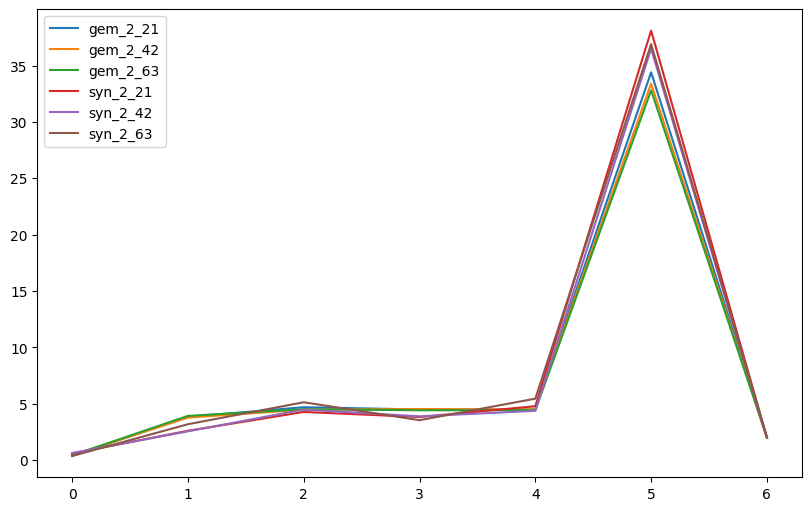

In [25]:
fig, ax = plt.subplots(figsize=(8, 5), layout='constrained')
ax.plot(list(sprse_gem_2_21.values()), label='gem_2_21')
ax.plot(list(sprse_gem_2_42.values()), label='gem_2_42')
ax.plot(list(sprse_gem_2_63.values()), label='gem_2_63')
ax.plot(list(sprse_syn_2_21.values()), label='syn_2_21')
ax.plot(list(sprse_syn_2_42.values()), label='syn_2_42')
ax.plot(list(sprse_syn_2_63.values()), label='syn_2_63')

ax.legend()
plt.show()

In [26]:
sprse_gem_5_21 = check_sparsity(gem_model_5_21, single = True)
print(sprse_gem_5_21)

sprse_gem_5_42 = check_sparsity(gem_model_5_42, single = True)
print(sprse_gem_5_42)

sprse_gem_5_63 = check_sparsity(gem_model_5_63, single = True)
print(sprse_gem_5_63)

{'layer_1': 3.147, 'layer_3': 5.3, 'layer_4': 7.68, 'layer_5': 7.53, 'layer_6': 10.54, 'layer_7': 39.6, 'overall_sparsity': 4.998}
{'layer_1': 3.131, 'layer_3': 5.45, 'layer_4': 8.35, 'layer_5': 7.34, 'layer_6': 10.06, 'layer_7': 39.3, 'overall_sparsity': 4.998}
{'layer_1': 3.114, 'layer_3': 5.72, 'layer_4': 7.56, 'layer_5': 7.35, 'layer_6': 10.85, 'layer_7': 37.9, 'overall_sparsity': 4.998}


In [27]:
sprse_syn_5_21 = check_sparsity(syn_model_5_21, single = True)
print(sprse_syn_5_21)

sprse_syn_5_42 = check_sparsity(syn_model_5_42, single = True)
print(sprse_syn_5_42)

sprse_syn_5_63 = check_sparsity(syn_model_5_63, single = True)
print(sprse_syn_5_63)

{'layer_1': 1.621, 'layer_3': 7.47, 'layer_4': 11.37, 'layer_5': 10.66, 'layer_6': 10.98, 'layer_7': 66.6, 'overall_sparsity': 5.013}
{'layer_1': 1.735, 'layer_3': 7.58, 'layer_4': 11.0, 'layer_5': 10.64, 'layer_6': 10.41, 'layer_7': 66.2, 'overall_sparsity': 5.013}
{'layer_1': 2.013, 'layer_3': 7.36, 'layer_4': 10.31, 'layer_5': 9.94, 'layer_6': 10.01, 'layer_7': 64.5, 'overall_sparsity': 5.013}


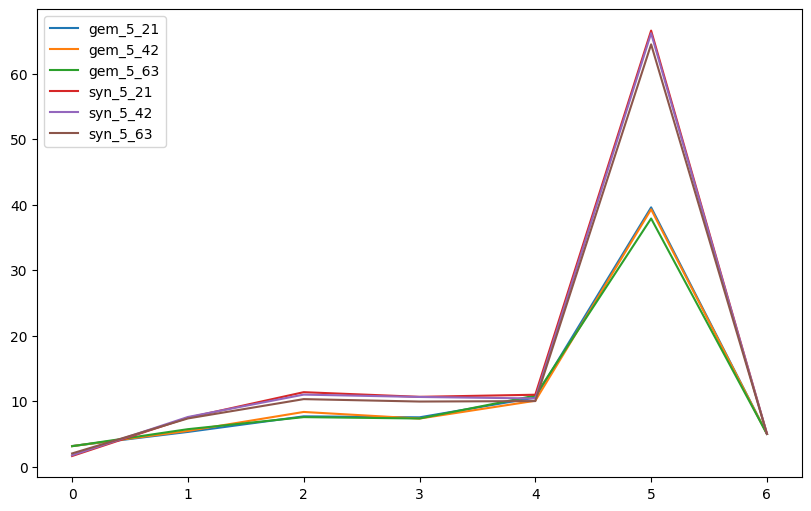

In [28]:
fig, ax = plt.subplots(figsize=(8, 5), layout='constrained')
ax.plot(list(sprse_gem_5_21.values()), label='gem_5_21')
ax.plot(list(sprse_gem_5_42.values()), label='gem_5_42')
ax.plot(list(sprse_gem_5_63.values()), label='gem_5_63')
ax.plot(list(sprse_syn_5_21.values()), label='syn_5_21')
ax.plot(list(sprse_syn_5_42.values()), label='syn_5_42')
ax.plot(list(sprse_syn_5_63.values()), label='syn_5_63')

ax.legend()
plt.show()

In [29]:
sprse_syn_10_21 = check_sparsity(syn_model_10_21, single = True)
print(sprse_syn_10_21)

sprse_syn_10_42 = check_sparsity(syn_model_10_42, single = True)
print(sprse_syn_10_42)

sprse_syn_10_63 = check_sparsity(syn_model_10_63, single = True)
print(sprse_syn_10_63)

{'layer_1': 3.511, 'layer_3': 14.45, 'layer_4': 23.41, 'layer_5': 22.37, 'layer_6': 23.51, 'layer_7': 81.3, 'overall_sparsity': 10.0}
{'layer_1': 3.713, 'layer_3': 15.49, 'layer_4': 22.38, 'layer_5': 20.97, 'layer_6': 23.22, 'layer_7': 82.3, 'overall_sparsity': 10.0}
{'layer_1': 3.399, 'layer_3': 14.52, 'layer_4': 23.33, 'layer_5': 22.99, 'layer_6': 23.66, 'layer_7': 82.5, 'overall_sparsity': 10.0}


In [30]:
sprse_gem_10_21 = check_sparsity(gem_model_10_21, single = True)
print(sprse_gem_10_21)

sprse_gem_10_42 = check_sparsity(gem_model_10_42, single = True)
print(sprse_gem_10_42)

sprse_gem_10_63 = check_sparsity(gem_model_10_63, single = True)
print(sprse_gem_10_63)

{'layer_1': 9.459, 'layer_3': 6.58, 'layer_4': 10.3, 'layer_5': 9.58, 'layer_6': 14.55, 'layer_7': 42.1, 'overall_sparsity': 9.998}
{'layer_1': 9.564, 'layer_3': 6.64, 'layer_4': 11.09, 'layer_5': 9.28, 'layer_6': 13.28, 'layer_7': 41.1, 'overall_sparsity': 9.998}
{'layer_1': 9.344, 'layer_3': 7.1, 'layer_4': 10.18, 'layer_5': 9.94, 'layer_6': 14.81, 'layer_7': 40.9, 'overall_sparsity': 9.998}


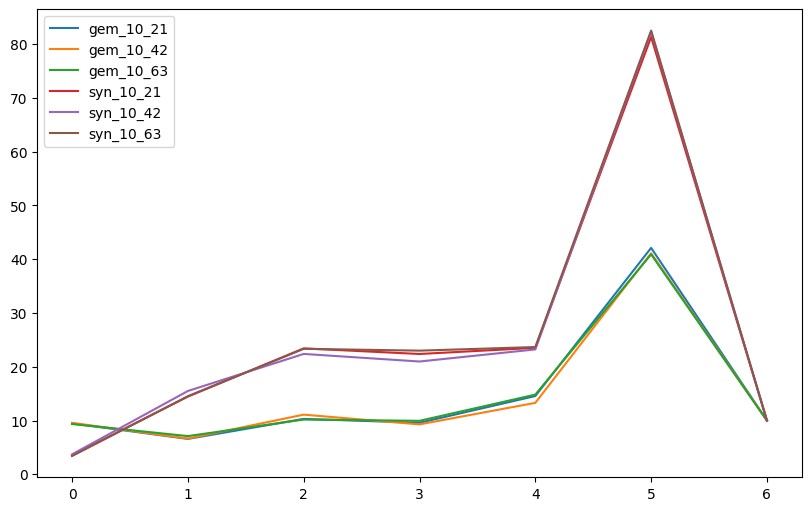

In [31]:
fig, ax = plt.subplots(figsize=(8, 5), layout='constrained')
ax.plot(list(sprse_gem_10_21.values()), label='gem_10_21')
ax.plot(list(sprse_gem_10_42.values()), label='gem_10_42')
ax.plot(list(sprse_gem_10_63.values()), label='gem_10_63')
ax.plot(list(sprse_syn_10_21.values()), label='syn_10_21')
ax.plot(list(sprse_syn_10_42.values()), label='syn_10_42')
ax.plot(list(sprse_syn_10_63.values()), label='syn_10_63')

ax.legend()
plt.show()

In [32]:
sprse_gem_20_21 = check_sparsity(gem_model_20_21, single = True)
print(sprse_gem_20_21)

sprse_gem_20_42 = check_sparsity(gem_model_20_42, single = True)
print(sprse_gem_20_42)

sprse_gem_20_63 = check_sparsity(gem_model_20_63, single = True)
print(sprse_gem_20_63)

{'layer_1': 20.356, 'layer_3': 16.69, 'layer_4': 17.9, 'layer_5': 17.04, 'layer_6': 22.87, 'layer_7': 46.8, 'overall_sparsity': 19.997}
{'layer_1': 20.416, 'layer_3': 15.96, 'layer_4': 18.33, 'layer_5': 18.1, 'layer_6': 21.81, 'layer_7': 45.1, 'overall_sparsity': 19.997}
{'layer_1': 20.078, 'layer_3': 16.53, 'layer_4': 18.76, 'layer_5': 19.18, 'layer_6': 22.38, 'layer_7': 45.0, 'overall_sparsity': 19.997}


In [33]:
sprse_syn_20_21 = check_sparsity(syn_model_20_21, single = True)
print(sprse_syn_20_21)

sprse_syn_20_42 = check_sparsity(syn_model_20_42, single = True)
print(sprse_syn_20_42)

sprse_syn_20_63 = check_sparsity(syn_model_20_63, single = True)
print(sprse_syn_20_63)

{'layer_1': 7.86, 'layer_3': 31.81, 'layer_4': 46.52, 'layer_5': 46.42, 'layer_6': 45.4, 'layer_7': 92.3, 'overall_sparsity': 20.184}
{'layer_1': 7.413, 'layer_3': 32.86, 'layer_4': 47.1, 'layer_5': 47.05, 'layer_6': 46.63, 'layer_7': 92.4, 'overall_sparsity': 20.184}
{'layer_1': 7.278, 'layer_3': 33.04, 'layer_4': 47.26, 'layer_5': 47.55, 'layer_6': 46.94, 'layer_7': 91.5, 'overall_sparsity': 20.184}


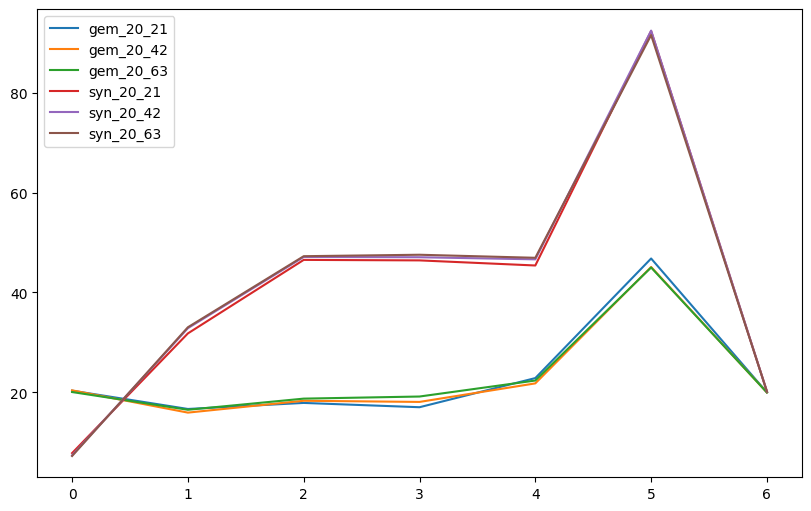

In [34]:
fig, ax = plt.subplots(figsize=(8, 5), layout='constrained')
ax.plot(list(sprse_gem_20_21.values()), label='gem_20_21')
ax.plot(list(sprse_gem_20_42.values()), label='gem_20_42')
ax.plot(list(sprse_gem_20_63.values()), label='gem_20_63')
ax.plot(list(sprse_syn_20_21.values()), label='syn_20_21')
ax.plot(list(sprse_syn_20_42.values()), label='syn_20_42')
ax.plot(list(sprse_syn_20_63.values()), label='syn_20_63')

ax.legend()
plt.show()

In [35]:
sprse_gem_abs_50_21 = check_sparsity(gem_model_50_21, single = True)
sprse_gem_abs_50_21

{'layer_1': 49.116,
 'layer_3': 49.84,
 'layer_4': 49.62,
 'layer_5': 50.53,
 'layer_6': 51.03,
 'layer_7': 58.8,
 'overall_sparsity': 49.579}

In [36]:
sprse_gem_abs_50_42 = check_sparsity(gem_model_50_42, single = True)
sprse_gem_abs_50_42

{'layer_1': 48.798,
 'layer_3': 50.2,
 'layer_4': 49.56,
 'layer_5': 49.74,
 'layer_6': 50.12,
 'layer_7': 57.3,
 'overall_sparsity': 49.24}

In [37]:
sprse_gem_abs_50_63 = check_sparsity(gem_model_50_63, single = True)
sprse_gem_abs_50_63

{'layer_1': 48.682,
 'layer_3': 49.63,
 'layer_4': 49.75,
 'layer_5': 50.53,
 'layer_6': 50.44,
 'layer_7': 57.9,
 'overall_sparsity': 49.23}

In [38]:
sprse_syn_50_21 = check_sparsity(syn_model_50_21, single = True)
sprse_syn_50_21

{'layer_1': 31.662,
 'layer_3': 85.03,
 'layer_4': 85.64,
 'layer_5': 84.98,
 'layer_6': 84.73,
 'layer_7': 98.1,
 'overall_sparsity': 50.119}

In [39]:
sprse_syn_50_42 = check_sparsity(syn_model_50_42, single = True)
sprse_syn_50_42

{'layer_1': 31.448,
 'layer_3': 85.76,
 'layer_4': 85.75,
 'layer_5': 85.34,
 'layer_6': 85.1,
 'layer_7': 99.2,
 'overall_sparsity': 50.119}

In [40]:
sprse_syn_50_63 = check_sparsity(syn_model_50_63, single = True)
sprse_syn_50_63

{'layer_1': 31.619,
 'layer_3': 85.12,
 'layer_4': 85.09,
 'layer_5': 85.43,
 'layer_6': 85.08,
 'layer_7': 98.1,
 'overall_sparsity': 50.119}

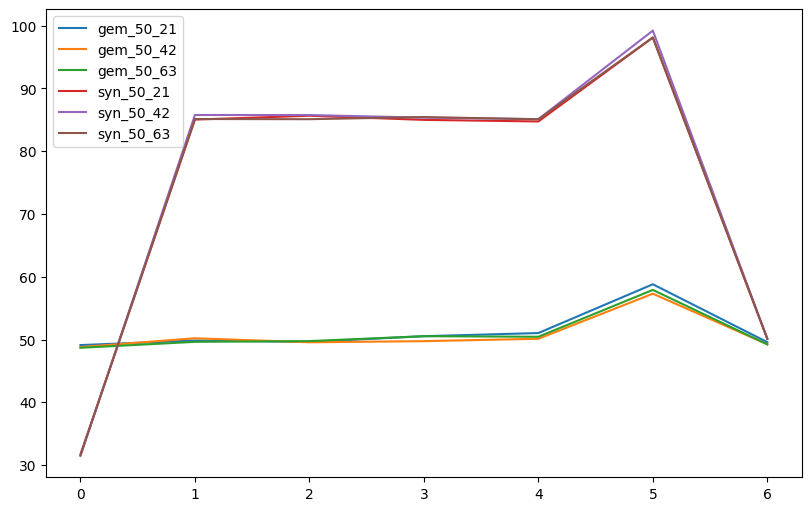

In [41]:
fig, ax = plt.subplots(figsize=(8, 5), layout='constrained')
ax.plot(list(sprse_gem_abs_50_21.values()), label='gem_50_21')
ax.plot(list(sprse_gem_abs_50_42.values()), label='gem_50_42')
ax.plot(list(sprse_gem_abs_50_63.values()), label='gem_50_63')
ax.plot(list(sprse_syn_50_21.values()), label='syn_50_21')
ax.plot(list(sprse_syn_50_42.values()), label='syn_50_42')
ax.plot(list(sprse_syn_50_63.values()), label='syn_50_63')
ax.legend()
plt.show()

# NNSTD - nee use MAED ! should work rather well for DNN or nah ?

In [42]:
# MAED 
def mean_absolute_error_distance(a,b):
    
    a_flat_sort = np.sort(a.flatten())
    b_flat_sort = np.flip(np.sort(b.flatten()))
    
    worst_alignment = sum(abs(a_flat_sort - b_flat_sort))

    dist = sum(abs(a - b).flatten()) / worst_alignment
    
    
    return dist

In [45]:
# dist for diff seed but same prune method, and dist between diff prune method 
gem_fil_50_42 = get_filters(gem_model_50_42)
gem_fil_50_63 = get_filters(gem_model_50_63)

In [46]:
test = order_by_dist(gem_fil_50_42, gem_fil_50_63, mean_absolute_error_distance)

NameError: name 'copy' is not defined

In [ ]:
fil_1 = gem_fil_50_42
fil_2 = gem_fil_50_63

new_mat = np.zeros((len(fil_1[0]), len(fil_2[0])), dtype=float)

for i in range(len(fil_1[0])):
    for j in range(len(fil_2[0])):
        dist = 0
        
        dist = mean_absolute_error_distance(fil_1[0][i].flatten(),fil_2[0][j].flatten())
        
        new_mat[i][j] = dist

In [ ]:
plt.imshow(new_mat, cmap = "rainbow")
plt.show()

In [ ]:
sum(new_mat.diagonal()) / 100

In [ ]:
fil_1 = gem_fil_50_42
fil_2 = test

new_mat = np.zeros((len(fil_1[0]), len(fil_2[0])), dtype=float)

for i in range(len(fil_1[0])):
    for j in range(len(fil_2[0])):
        dist = 0
        
        dist = mean_absolute_error_distance(fil_1[0][i].flatten(),fil_2[0][j].flatten())
        
        new_mat[i][j] = dist

In [ ]:
plt.imshow(new_mat, cmap = "rainbow")
plt.show()

In [ ]:
sum(new_mat.diagonal()) / 100

# compare random networks

In [ ]:
# fine tuning gem miner to get similar to synflow 
# also might be interesting to compare intial tickets

# semantic analysis

In [ ]:
gem_fm_50_42 = get_activation_series(images_mnist, gem_fil_50_42, "all")
gem_fm_50_63 = get_activation_series(images_mnist, gem_fil_50_63, "all")
gem_gem_cor = get_correlation(gem_fm_50_42, gem_fm_50_63)

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(8,8))

counter = 0

for ax in axs.flat:
    img = gem_gem_cor[counter]
    ax.imshow(img, cmap = "rainbow")
    ax.set_title(f"syn_conv_layer_{counter + 1}")
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    #if counter == 1:
    #    break
    counter += 1

plt.tight_layout()
plt.show()

In [ ]:
all_gem_gem_max_matched_matrices = []
all_gem_gem_semi_matched_matrices = []

gem_fm_50_42 = get_activation_series(images_mnist, gem_fil_50_42, "all")
gem_fm_50_63 = get_activation_series(images_mnist, gem_fil_50_63, "all")
gem_gem_cor = get_correlation(gem_fm_50_42, gem_fm_50_63)

for i in range(6):
    
    gem_gem_match_semi_no_diag = find_semi_matching(gem_gem_cor[i])
    gem_gem_mat_semi = change_mat_semi(gem_gem_cor[i],gem_gem_match_semi_no_diag)
    
    all_gem_gem_semi_matched_matrices.append(gem_gem_mat_semi)
    
    gem_gem_match_max_no_diag = find_max_matching(gem_gem_cor[i])
    gem_gem_mat_max = change_mat_semi(gem_gem_cor[i],gem_gem_match_max_no_diag)
    
    all_gem_gem_max_matched_matrices.append(gem_gem_mat_max)
    

In [ ]:
first = all_gem_gem_max_matched_matrices[0]
plt.imshow(first, cmap = "rainbow")
plt.show()

In [ ]:
sum(all_gem_gem_max_matched_matrices[1].diagonal()) / (len(all_gem_gem_max_matched_matrices[1].diagonal()))

In [ ]:
xcor = gem_gem_cor[1]
match = find_max_matching(gem_gem_cor[1])

match_vals = xcor[np.arange(xcor.shape[0]),match]
diag_order = (-xcor.max(1)).argsort()

hmax,= plt.plot(xcor[diag_order,:].max(1), 'o-', color=(.21/.84,.84/.84,.57/.84), lw=2, ms=10)
hmatch,= plt.plot(match_vals[diag_order], 'o-', color=(0,.45,.25), lw=2, ms=5)


plt.show()